In [1]:
## Let's go ahead and start with some imports
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr

## For reading stock data from yahoo and nse
import fix_yahoo_finance as yf
yf.pdr_override()
from nsepy import get_history

## For time stamps
from datetime import timedelta
from datetime import date
import calendar

## For stats
import statsmodels.api as sm
from scipy import stats

## For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

C:\Users\moodmyntra\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Let's use NSE and pandas to grab some data for some index.

In [2]:
assets = ['NIFTY','BANKNIFTY']
today = date.today()
data = pd.DataFrame()
for n in assets:
    data[n] = get_history(symbol=n, start=date(2011,1,1), end=today,index=True)['Close']

In [3]:
data.tail()

,NIFTY,BANKNIFTY
Date,,
2018-05-23,10430.35,25684.95
2018-05-24,10513.85,26016.80
2018-05-25,10605.15,26273.55
2018-05-28,10688.65,26614.25
2018-05-29,10633.30,26254.80


In [4]:
data.head()

,NIFTY,BANKNIFTY
Date,,
2011-01-03,6157.60,11855.75
2011-01-04,6146.35,11564.05
2011-01-05,6079.80,11305.45
2011-01-06,6048.25,11186.80
2011-01-07,5904.60,11053.35


In [5]:
data.iloc[0]

NIFTY         6157.60
BANKNIFTY    11855.75
Name: 2011-01-03, dtype: float64

# Graphical presentation of nifty and banknifty index

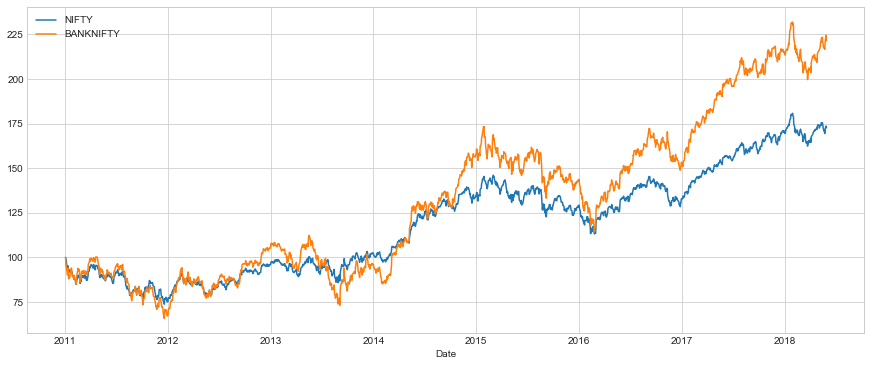

In [6]:
(data/data.iloc[0]*100).plot(figsize=(15,6));
plt.show()

In [7]:
# General Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 2011-01-03 to 2018-05-29
Data columns (total 2 columns):
NIFTY        1836 non-null float64
BANKNIFTY    1836 non-null float64
dtypes: float64(2)
memory usage: 43.0+ KB


In [8]:
# Summary Stats
data.describe()

,NIFTY,BANKNIFTY
count,1836.000000,1836.000000
mean,7315.379984,15631.128540
std,1740.036765,5147.681501
min,4544.200000,7798.550000
25%,5686.037500,10949.500000
50%,7568.900000,15304.275000
75%,8557.250000,18896.450000
max,11130.400000,27498.450000


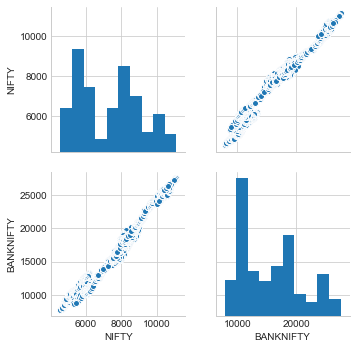

In [9]:
sns.pairplot(data)

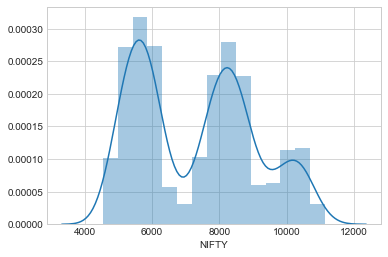

In [10]:
sns.distplot(data['NIFTY'])

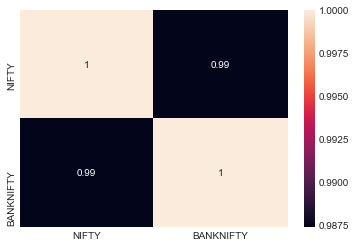

In [11]:
sns.heatmap(data.corr(),annot=True)

# Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

Read more: Covariance https://www.investopedia.com/terms/c/covariance.asp#ixzz5GkUGsgwf 
Follow us: Investopedia on Facebook

In [12]:
sec_returns = np.log( data / data.shift(1))

In [13]:
cov_matrix=sec_returns.cov()*250
cov_matrix

,NIFTY,BANKNIFTY
NIFTY,0.024000,0.030665
BANKNIFTY,0.030665,0.050486


# Correlation, in the finance and investment industries, is a statistic that measures the degree to which two securities move in relation to each other. Correlations are used in advanced portfolio management. Correlation is computed into what is known as the correlation coefficient, which has value that must fall between -1 and 1.

Read more: Correlation https://www.investopedia.com/terms/c/correlation.asp#ixzz5GkUWIZqc 
Follow us: Investopedia on Facebook

In [14]:
corr_matrix=sec_returns.corr()
corr_matrix

,NIFTY,BANKNIFTY
NIFTY,1.000000,0.880968
BANKNIFTY,0.880968,1.000000


In [15]:
X=data['NIFTY']
Y=data['BANKNIFTY']

# Regression is a statistical measure used in finance, investing and other disciplines that attempts to determine the strength of the relationship between one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables). 
Read more: Regression https://www.investopedia.com/terms/r/regression.asp#ixzz5GkTeAQM4 
Follow us: Investopedia on Facebook

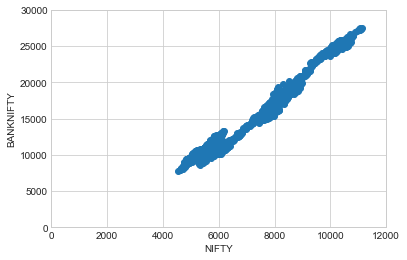

In [16]:
plt.scatter(X,Y)
plt.axis([0,12000,0,30000])
plt.ylabel('BANKNIFTY')
plt.xlabel('NIFTY')
plt.show()

In [17]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BANKNIFTY   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 7.118e+04
Date:                Tue, 29 May 2018   Prob (F-statistic):               0.00
Time:                        17:39:11   Log-Likelihood:                -14914.
No. Observations:                1836   AIC:                         2.983e+04
Df Residuals:                    1834   BIC:                         2.984e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5736.9717     82.326    -69.686      0.000   -5898.434   -5575.509
NIFTY          2.9210      0.011    266.792      0.000       2.900       2.942
==============================================================================
Omnibus:                      187.295   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.666
Skew:                          -0.514   Prob(JB):                     2.31e-27
Kurtosis:                       2.260   Cond. No.                     3.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
-5728.9635+2.9197*10605.15

25234.892955000003

# Key Regression metrics

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [20]:
# beta
slope  

2.920982956017879

In [21]:
# alpha
intercept

-5736.971708760582

In [22]:
r_value

0.9873605683787222

In [23]:
r_value**2

0.9748808919891534

In [24]:
std_err

0.010948526775575123

In [25]:
p_value

0.0

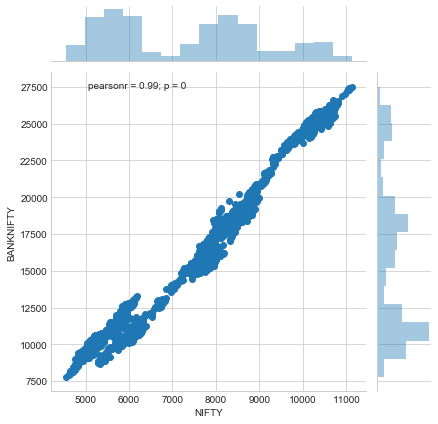

In [26]:
sns.jointplot('NIFTY','BANKNIFTY',data,kind='scatter')

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [27]:
# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.rolling_mean(data['NIFTY'],ma)

C:\Users\moodmyntra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  
C:\Users\moodmyntra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  
C:\Users\moodmyntra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  


In [28]:
column_name

'MA for 50 days'

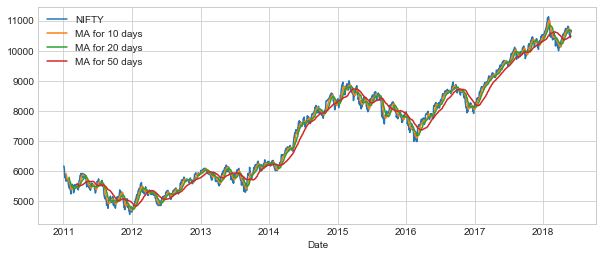

In [29]:
data[['NIFTY','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [30]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.rolling_mean(data['BANKNIFTY'],ma)

C:\Users\moodmyntra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\moodmyntra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\Users\moodmyntra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


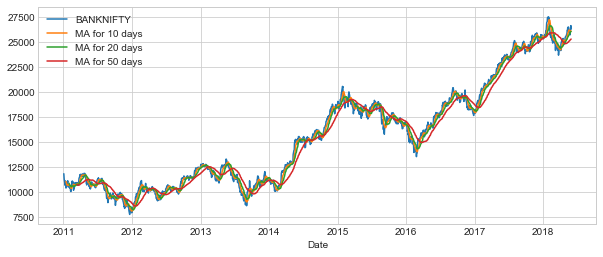

In [31]:
data[['BANKNIFTY','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))